# Inputs:
**reference sequences** are from `/cellar/users/ramarty/Data/kir/ref/all_alleles_and_random` which consists of all the *KIR alleles*(n= 703) from [IPD](https://www.ebi.ac.uk/ipd/kir/sequenced_haplotypes.html) and 100 random genes (n = 100, ID starts with ENST)

**remapped reads** are .bam files in `/nrnb/users/ramarty/TCGA/exome/{TCGA-short-bard-code}/KIR_and_unmappedlaligned.bam`.

To see the pipeline that produces them please refer to `/data_gathering/TCGA/exon_data_pull.ipynb` for more detail

# Question I want to answer.
1. per sample
- how many read are mapped to KIR/random gene region (coverage) `bedtools`
- do these two correlate
- collapsing KIR alleles into KIR genes, do all samples have anchoring KIRs (which they should have)
- KIRs are very homologous and do 1 read map to multiple allele?? **UNANSWERED** HOW TO USE BED TOOLS WHILE PRESERVING ALIGNMENT QUALITY
- how good do they align ( how do I detect reads that are mapped incorretly, quality score? a lot of inder/SNPs) **UNANSWERED** HOW TO USE BED TOOLS WHILE PRESERVING ALIGNMENT QUALITY

2. group by KIT

# List all remapped exomes in Rachel's directory and run all of them with bedtools

In [4]:
import os
folder = '/nrnb/users/ramarty/TCGA/exomes/'
input_short_id_list = [f.path for f in os.scandir(folder) if f.is_dir() ]

In [5]:
len(input_short_id_list)

10529

In [4]:
# run bedtools for all bam in regard to coverage of reference sequence

# all short_id

# generate script to send to cluster
import sys
sys.path.append("/cellar/users/hsher/KIR_development") 
from KIR_read.send_to_cluster import slurm_bedtools


In [7]:
slurm_bedtools(short_id_list, '/cellar/users/hsher/KIR_development/KIR_read/bdslurm.sh')
# Submitted batch job 153703, was done in 3 minutes like @@ super quick 

# Not all remapped sequence have bedtools output DONT KNOW WHY

In [3]:
short_id_list = [i.split('/')[-1] for i in short_id_list] # just the barcode would be enough

In [3]:
# not all alignments are sucessfully done with bedtools but there was no error message liek WTF
folder = '/cellar/users/hsher/Data/KIR_coverage'
short_id_list = [f.path for f in os.scandir(folder) if f.is_file() ]
short_id_list = [i.split('/')[-1] for i in short_id_list]

In [67]:
len(short_id_list)

9001

In [6]:
set(short_id_list)- set(input_short_id_list) # opened these file but cannot figure out any problem with them

{'TCGA-AA-A02O',
 'TCGA-28-2514',
 'TCGA-CZ-5982',
 'TCGA-C5-A1ME',
 'TCGA-BP-4973',
 'TCGA-A1-A0SI',
 'TCGA-C5-A7CL',
 'TCGA-B0-5097',
 'TCGA-C8-A12U',
 'TCGA-HG-A9SC',
 'TCGA-G4-6298',
 'TCGA-B5-A3FD',
 'TCGA-2Z-A9JM',
 'TCGA-SJ-A6ZJ',
 'TCGA-FL-A1YG',
 'TCGA-56-5898',
 'TCGA-AJ-A2QM',
 'TCGA-B3-4104',
 'TCGA-IA-A40U',
 'TCGA-G3-A5SM',
 'TCGA-HZ-A8P0',
 'TCGA-CW-5585',
 'TCGA-ZF-AA5P',
 'TCGA-2H-A9GR',
 'TCGA-D5-6932',
 'TCGA-5P-A9K6',
 'TCGA-AB-2859',
 'TCGA-BA-A6DE',
 'TCGA-HJ-7597',
 'TCGA-D7-6818',
 'TCGA-AA-3980',
 'TCGA-B5-A11Y',
 'TCGA-DX-AB32',
 'TCGA-QR-A6H1',
 'TCGA-QK-A8ZA',
 'TCGA-LL-A7SZ',
 'TCGA-GU-AATQ',
 'TCGA-MB-A5YA',
 'TCGA-KM-8441',
 'TCGA-KK-A7AW',
 'TCGA-3X-AAVE',
 'TCGA-66-2766',
 'TCGA-OR-A5L2',
 'TCGA-Q1-A73R',
 'TCGA-BH-A1FG',
 'TCGA-B5-A3FC',
 'TCGA-DU-6408',
 'TCGA-WB-A81S',
 'TCGA-BR-A4IV',
 'TCGA-BP-4982',
 'TCGA-C5-A1BM',
 'TCGA-FC-A6HD',
 'TCGA-FV-A3I0',
 'TCGA-H4-A2HO',
 'TCGA-D8-A1XO',
 'TCGA-G8-6324',
 'TCGA-29-A5NZ',
 'TCGA-BC-A216',
 'TCGA-CM-6162

# A list to tell us which allele belongs to who

In [14]:
import pandas as pd
def read_kir_allele(file = '/cellar/users/hsher/Data/KIR_reference/KIR_annotation.tsv'):
    return(pd.read_csv(file, header = 0, index_col = 0, sep = '\t'))

In [15]:
kir_anno = read_kir_allele()

In [18]:
kir_anno.loc[kir_anno['gene'].str.contains('KIR'), 'is_kir'] = True
kir_anno.fillna(False, inplace = True)

In [19]:
kir_anno.head() # contain random genes

,allele,gene,is_kir
KIR_ID,,,
IPD:KIR00020,KIR2DL4*00101,KIR2DL4,True
IPD:KIR00021,KIR2DL4*0010201,KIR2DL4,True
IPD:KIR00424,KIR2DL4*0010202,KIR2DL4,True
IPD:KIR00112,KIR2DL4*0010301,KIR2DL4,True
IPD:KIR00115,KIR2DL4*0010302,KIR2DL4,True


# Let's parse the bedtool output and extract meaningful features

In [58]:
anchor_genes = ['KIR3DL3', 'KIR3DP1', 'KIR2DL4', 'KIR3DL2']
def read_bed_coverage(short_id):
    '''
    read `bedtool coverage -b SHORT_ID_.bam -a reference.bed` output file
    input SHORT ID name
    return data frame with rows = KIR allele, index = IPD_ID, columns = read(how many reads map to that region), breadth(% of region covered by at least 1 read)
    '''
    base = '/cellar/users/hsher/Data/KIR_coverage/'
    df = pd.read_csv(base + short_id, header = None, sep = '\t', index_col = 0, names = 
                     ['gene_id','kir_start', 'kir_end', 'reads', 'length', 'total_length', 'breadth'])
    
    return(df[['reads', 'breadth']])
def KIR_no_reads(df):
    '''
    return # of read mapped to KIR alleles
    '''
    return(df.loc[kir_anno['is_kir'], 'reads'].sum())
def random_no_reads(df):
    '''
    return # of read mapped to random genes
    '''
    return(df.loc[~kir_anno['is_kir'], 'reads'].sum())
def each_KIR_reads(df):
    '''
    return reads mapped to each anchoring gene
    '''
    anchor_count = []
    anchor_max_two_allele = []
    anchor_max_breadth_allele = []
    anchor_max_read = []
    anchor_max_breadth = []
    for a_gene in anchor_genes:
        IPD_index = kir_anno.loc[kir_anno['gene']== a_gene].index
        anchor_count.append(df.loc[IPD_index,'reads'].sum())
        anchor_max_read.append(df.loc[IPD_index,'reads'].max())
        anchor_max_breadth.append(df.loc[IPD_index,'breadth'].sum())
        anchor_max_two_allele += df.loc[IPD_index,'reads'].nlargest(n= 2).index.tolist()
        anchor_max_breadth_allele += df.loc[IPD_index,'breadth'].nlargest(n= 2).index.tolist()
    return(anchor_count,anchor_max_read,anchor_max_breadth, anchor_max_two_allele, anchor_max_breadth_allele)

In [89]:
# iterate through 1000 randomly sampled alignements :)
sampled_id = pd.Series(short_id_list).sample(1000)

In [90]:
sum_stats = pd.DataFrame(index = sampled_id, columns = ['KIR_total_read', 'random_total_read']+
                                                       [a_gene+'total_read' for a_gene in anchor_genes]+
                                                       [a_gene+'max_read' for a_gene in anchor_genes]+
                                                       [a_gene+'max_breadth' for a_gene in anchor_genes]+
                                                       [a_gene+'max_read_allele_' + str(y) for a_gene in anchor_genes for y in range(1,3)]+
                                                       [a_gene+'max_breadth_allele_'+ str(y) for a_gene in anchor_genes for y in range(1,3)]
                                                       )

for sid in sampled_id:
    df = read_bed_coverage(sid)
    sum_stats.loc[sid, 'random_total_read'] = random_no_reads(df)
    sum_stats.loc[sid, 'KIR_total_read'] = KIR_no_reads(df)
    
    anchor_count, anchor_max_read, anchor_max_breadth, anchor_max_two_allele, anchor_max_breadth_allele = each_KIR_reads(df)
    
    sum_stats.loc[sid, [a_gene+'total_read' for a_gene in anchor_genes]] = anchor_count
    sum_stats.loc[sid, [a_gene+'max_read' for a_gene in anchor_genes]] = anchor_max_read
    sum_stats.loc[sid, [a_gene+'max_breadth' for a_gene in anchor_genes]] = anchor_max_breadth
    
    sum_stats.loc[sid, [a_gene+'max_read_allele_' + str(y) for a_gene in anchor_genes for y in range(1,3)]] = anchor_max_two_allele
    sum_stats.loc[sid, [a_gene+'max_breadth_allele_' + str(y) for a_gene in anchor_genes for y in range(1,3)]] = anchor_max_breadth_allele

In [209]:
sum_stats.columns

Index(['KIR_total_read', 'random_total_read', 'KIR3DL3total_read',
       'KIR3DP1total_read', 'KIR2DL4total_read', 'KIR3DL2total_read',
       'KIR3DL3max_read', 'KIR3DP1max_read', 'KIR2DL4max_read',
       'KIR3DL2max_read', 'KIR3DL3max_breadth', 'KIR3DP1max_breadth',
       'KIR2DL4max_breadth', 'KIR3DL2max_breadth', 'KIR3DL3max_read_allele_1',
       'KIR3DL3max_read_allele_2', 'KIR3DP1max_read_allele_1',
       'KIR3DP1max_read_allele_2', 'KIR2DL4max_read_allele_1',
       'KIR2DL4max_read_allele_2', 'KIR3DL2max_read_allele_1',
       'KIR3DL2max_read_allele_2', 'KIR3DL3max_breadth_allele_1',
       'KIR3DL3max_breadth_allele_2', 'KIR3DP1max_breadth_allele_1',
       'KIR3DP1max_breadth_allele_2', 'KIR2DL4max_breadth_allele_1',
       'KIR2DL4max_breadth_allele_2', 'KIR3DL2max_breadth_allele_1',
       'KIR3DL2max_breadth_allele_2'],
      dtype='object')

# Also put in capture kit info
- not all samples know which capture kit. STRANG

In [173]:
# capture kit info
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

capture_kits = pd.read_csv('/cellar/users/ramarty/Data/kir/ref/sample.capture.kit', sep='\t')

capture_kits.dropna(inplace = True)
capture_kits.set_index('SHORT_ID', inplace = True)


# A few samples not even have 1 KIR read. They are useless and should be removed

In [163]:
# catch samples with no KIR at all: which capture kit is it
capture_kits.loc[sum_stats.loc[sum_stats['KIR_total_read'] == 0].index, 'KIT'].value_counts()
# some are not in capture_kit???

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


Agilent Custom     14
Nimblegen.SQEZ2     1
Sureselect.38       1
Name: KIT, dtype: int64

In [188]:
# capture kit color

import matplotlib.colors as colors
import matplotlib.cm as cmx
z = range(1,13)
hot = plt.get_cmap('tab20')
cNorm  = colors.Normalize(vmin=0, vmax=13)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

color_dict = {}
i = 0
for kit in capture_kits['KIT'].unique():
    color_dict[kit] = scalarMap.to_rgba(i)
    i+= 1
import numpy as np
color_dict[np.nan] = scalarMap.to_rgba(i)


In [179]:
capture_kits = capture_kits.loc[sum_stats.index].reset_index().drop_duplicates('SHORT_ID').set_index('SHORT_ID')

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [185]:
capture_kits.shape

(1000, 2)

In [189]:
 color = capture_kits.loc[sum_stats.index, 'KIT'].map(color_dict)

# Random gene reads v.s. KIR reads
- positively correlated but have are capture kit specific
- THUS random gene reads are not good normalization

Text(0, 0.5, 'KIR No. read')

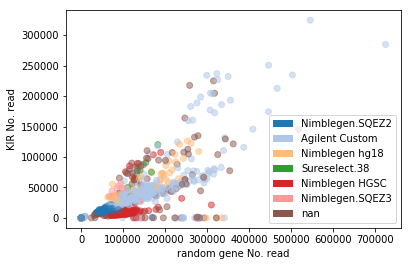

In [203]:
# correlation between random gene reads and KIR reads
d = plt.scatter(x = sum_stats['random_total_read'], y = sum_stats['KIR_total_read'], c = color, alpha = 0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor= color_dict[c],label=c) for c in color_dict.keys()]

plt.legend(handles = legend_elements)
plt.xlabel('random gene No. read')
plt.ylabel('KIR No. read')

# Distribution of 4 anchoring genes *TOTAL reads*
- I expect them to be similar because everyone has the same copy.
- If we don't look at capture kits they are.

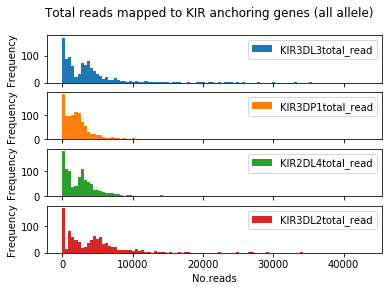

In [214]:
ax = sum_stats[['KIR3DL3total_read','KIR3DP1total_read','KIR2DL4total_read','KIR3DL2total_read']].plot.hist(subplots = True, bins = 100, title = 'Total reads mapped to KIR anchoring genes (all allele)')
for a in ax.flatten():
    a.set_xlabel("No.reads")

# But capture kits to make a difference. partly because of the coverage issue (but more than that factor)
- At least within one capture kit the 4 anchoring genes are quite even.

Text(0.5, 0.98, 'Total read of each anchoring KIR stratified by capture kit')

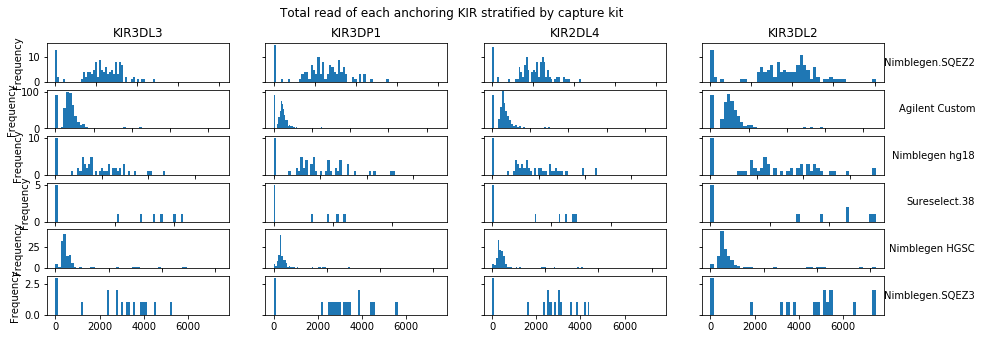

In [250]:
# capture kit difference
fig, ax = plt.subplots(nrows = len(capture_kits['KIT'].unique())-1, ncols = len(anchor_genes), figsize = (15,5), sharex = 'row', sharey = 'row')

c = 0
for a_gene in anchor_genes:
    r = 0
    for c_kit in capture_kits['KIT'].unique()[:-1]: # ignore nan
        sum_stats.loc[capture_kits['KIT'] == c_kit, a_gene+ 'total_read'].plot.hist(bins = 50, ax = ax[r, c])
        
        if r == 0:
            ax[r,c].set_title(a_gene)
        if c == 3:
            ax[r,c].text(s = c_kit, x = 1.5, y = 0.5, horizontalalignment='right', verticalalignment='center', transform=ax[r,c].transAxes)
        r += 1
    c += 1

plt.suptitle('Total read of each anchoring KIR stratified by capture kit')


# The KIR gene with most reads
- since KIR allele are highly homologous, I expect many reads are falsely aligned (if they are of common region)
- Every one should only have 2 KIR anchoring allele. By just looking at the allele with max reads might be more true.??
- it seems to be quite uniform??
- Not uniform between capturing kit.??

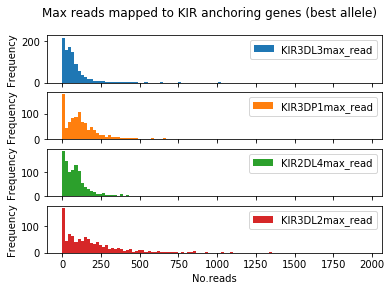

In [215]:
ax = sum_stats[['KIR3DL3max_read','KIR3DP1max_read','KIR2DL4max_read','KIR3DL2max_read']].plot.hist(subplots = True, bins = 100, title = 'Max reads mapped to KIR anchoring genes (best allele)')
for a in ax.flatten():
    a.set_xlabel("No.reads")

Text(0.5, 0.98, 'Max read of the best allele for each anchoring KIR stratified by capture kit')

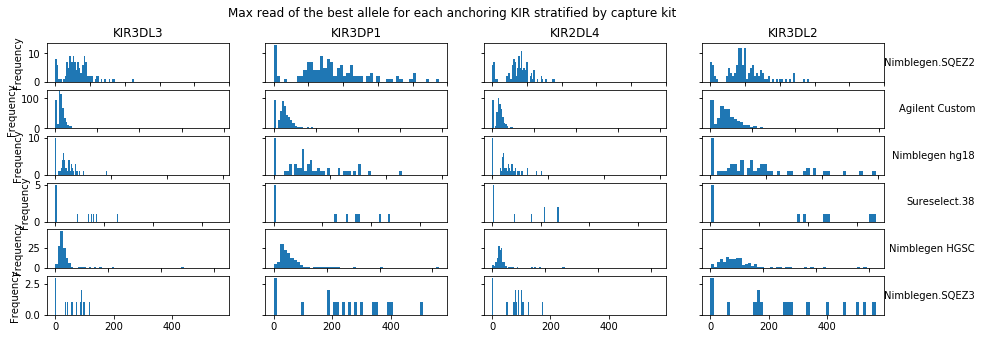

In [251]:
# capture kit difference
fig, ax = plt.subplots(nrows = len(capture_kits['KIT'].unique())-1, ncols = len(anchor_genes), figsize = (15,5), sharex = 'row', sharey = 'row')

c = 0
for a_gene in anchor_genes:
    r = 0
    for c_kit in capture_kits['KIT'].unique()[:-1]: # ignore nan
        sum_stats.loc[capture_kits['KIT'] == c_kit, a_gene+ 'max_read'].plot.hist(bins = 50, ax = ax[r, c])
        
        if r == 0:
            ax[r,c].set_title(a_gene)
        if c == 3:
            ax[r,c].text(s = c_kit, x = 1.5, y = 0.5, horizontalalignment='right', verticalalignment='center', transform=ax[r,c].transAxes)
        r += 1
    c += 1
plt.suptitle('Max read of the best allele for each anchoring KIR stratified by capture kit')

# Looking at the breadth
- the definition of breadth is that the % of sequence covered by at least 1 read.
- it seems the KIR3DP1 and KIR2DL4 has low breadth, meaning that they have less sequence coverage. This will make further allele typing (not just copy number estimation) hard for them

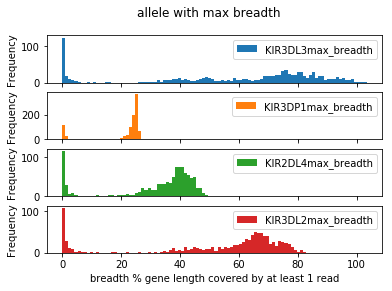

In [259]:
ax = sum_stats[['KIR3DL3max_breadth','KIR3DP1max_breadth','KIR2DL4max_breadth','KIR3DL2max_breadth']].plot.hist(subplots = True, bins = 100, title = "allele with max breadth")
for a in ax.flatten():
    a.set_xlabel("breadth % gene length covered by at least 1 read")

## stratify by capture kit
- For Nimblegen data will be hard to look at allele level KIR signatures due to low breadth

Text(0.5, 0.98, 'Max Breadth of each anchoring allele stratified by capture kit')

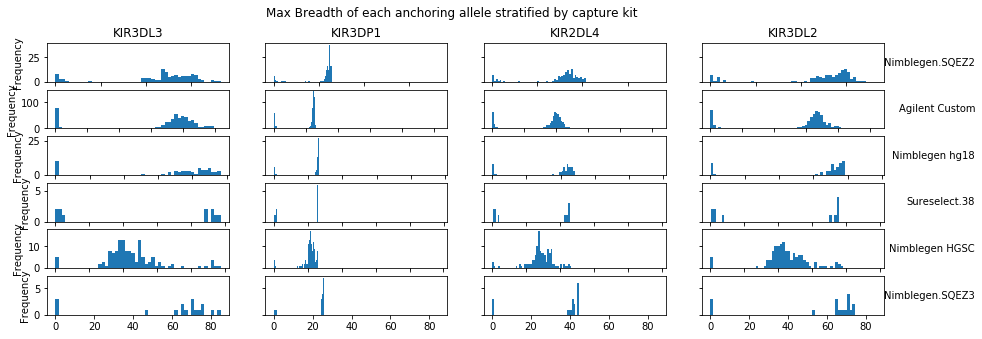

In [260]:
# capture kit difference
fig, ax = plt.subplots(nrows = len(capture_kits['KIT'].unique())-1, ncols = len(anchor_genes), figsize = (15,5), sharex = 'row', sharey = 'row')

c = 0
for a_gene in anchor_genes:
    r = 0
    for c_kit in capture_kits['KIT'].unique()[:-1]: # ignore nan
        sum_stats.loc[capture_kits['KIT'] == c_kit, a_gene+ 'max_breadth'].plot.hist(bins = 50, ax = ax[r, c])
        
        if r == 0:
            ax[r,c].set_title(a_gene)
        if c == 3:
            ax[r,c].text(s = c_kit, x = 1.5, y = 0.5, horizontalalignment='right', verticalalignment='center', transform=ax[r,c].transAxes)
        r += 1
    c += 1
plt.suptitle('Max Breadth of each anchoring allele stratified by capture kit')

# The purpose of looking to the reads is to find out better ways of normalizing our data.
- What we want out of normalization?
    - each people has sample range for anchroing KIR k-mers no matter what capture kit they use, no matter how long and how biasly that gene is amplified.
    - good normalization feature will have good correlation with KIR total reads and KIR individual anchoring gene reads

In [262]:
# to decide what to use for normalize. We might want to know the relation between 4-mer estimated coverage, random_gene_reads, random_gene k-mers
df_kir_ = pd.DataFrame()
chunks = pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_counts.csv', index_col=0, chunksize = 500)
for chunk in chunks:
    df_kir_ = df_kir_.append(chunk.loc[chunk.index.isin(sum_stats.index)])

In [263]:
df_kir__ir_ir_ir_kir_.shape

(977, 26803)

In [264]:
import json
kmers = {}
ks = [10, 15, 20, 25, 30, 35, 40]
for k in ks:
    with open('/cellar/users/ramarty/Data/kir/kmers/gene_grouped_kmers/{0}.txt'.format(str(k))) as infile:
        g = json.load(infile)
    kmers[k] = g

In [265]:
random_genes = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/kmers/reference_genes/random_genes.100.txt').readlines()]
len(random_genes) # 9936 random genes

9936

# Just looking at the normalization features. They are correlated
- but it seems reads has different relationship with its own k-mers.
- In some kit some regions generating specific k-mers are better captured.

Text(0, 0.5, 'random gene No. read')

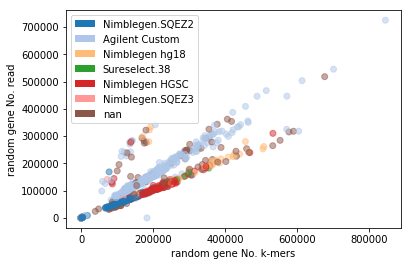

In [272]:
# correlation between random gene k-mer and random gene read
plt.scatter(df_kir_[random_genes].sum(axis = 1), sum_stats.loc[df_kir_.index, 'random_total_read'],  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('random gene No. k-mers')
plt.ylabel('random gene No. read')

Text(0, 0.5, 'random gene No. read')

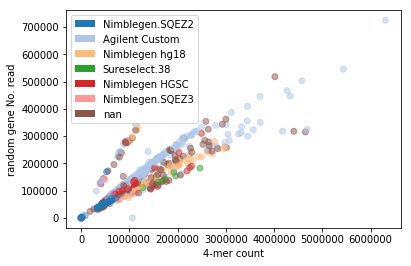

In [276]:
four_mers = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/kmers/kmer_groups/four_mers.txt').readlines()] 
plt.scatter(df_kir_[four_mers].sum(axis = 1), sum_stats.loc[df_kir_.index, 'random_total_read'],  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('4-mer count')
plt.ylabel('random gene No. read')

# correlation between KIR TOTAL reads and various normalization params
1. random gene reads
2. random gene k-mers
3. four mers: seems to have the least $r^2$

Text(0, 0.5, 'KIR No. read')

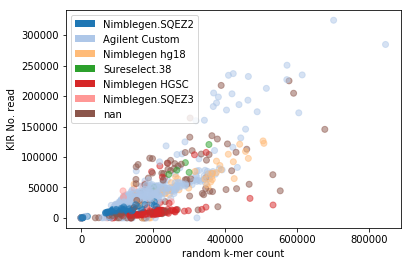

In [278]:
four_mers = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/kmers/kmer_groups/four_mers.txt').readlines()] 
plt.scatter(df_kir_[random_genes].sum(axis = 1), sum_stats.loc[df_kir_.index, 'KIR_total_read'],  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('random k-mer count')
plt.ylabel('KIR No. read')

Text(0, 0.5, 'KIR No. read')

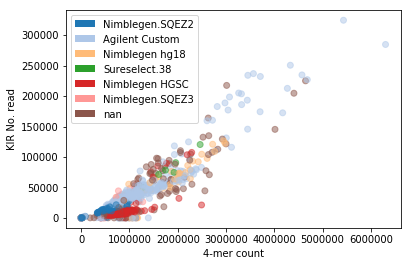

In [274]:
plt.scatter(df_kir_[four_mers].sum(axis = 1), sum_stats.loc[df_kir_.index, 'KIR_total_read'],  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('4-mer count')
plt.ylabel('KIR No. read')

# correlation between KIR TOTAL KMERS and various normalization params
1. random gene reads
2. random gene k-mers
3. four mers: seems to have the least $r^2$

In [279]:
# all kir kmers
all_kir_kmer = []
for k in kmers.keys():
    for kir in kmers[k].keys():
        all_kir_kmer += kmers[k][kir]

Text(0, 0.5, 'KIR No. k-mers')

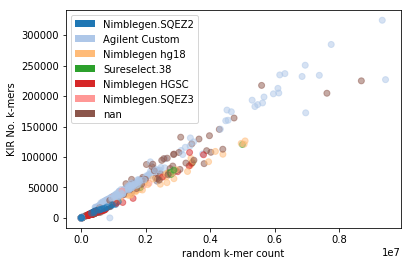

In [280]:
plt.scatter(df_kir_[all_kir_kmer].sum(axis = 1), sum_stats.loc[df_kir_.index, 'KIR_total_read'],  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('KIR No. k-mers')
plt.ylabel('KIR No. reads')

- This is actually a good sign that KIRs don't have obvious read --> k-mer nuiances like random genes
- Random genes seems to have some mysterious effects itself??? May not be a good factor for normalization

Text(0, 0.5, 'random No. reads')

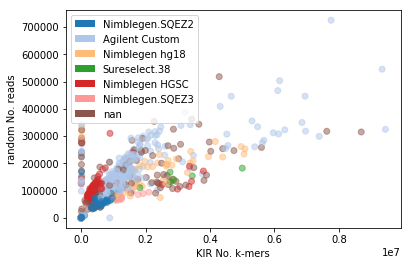

In [282]:
plt.scatter(df_kir_[all_kir_kmer].sum(axis = 1), sum_stats.loc[df_kir_.index, 'random_total_read'],  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('KIR No. k-mers')
plt.ylabel('random No. reads')

- see it's actually random gene's problem!

Text(0, 0.5, 'No. 4-mers')

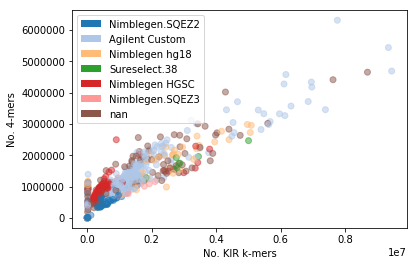

In [283]:
plt.scatter(df_kir_[all_kir_kmer].sum(axis = 1), df_kir_[four_mers].sum(axis = 1),  color = capture_kits.loc[df_kir_.index, 'KIT'].map(color_dict), alpha = 0.5)
plt.legend(handles = legend_elements)
plt.xlabel('No. KIR k-mers')
plt.ylabel('No. 4-mers')

# Conclusion
- remove samples with zero KIR reads
- random genes itself has some other effects in capture kits so don't use it for normalization
- 4-mer might still be better. 